In [19]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import os

In [20]:
#dfs = pd.read_excel('/home/mxenoc/workspace/multiomics-benchmark/data/multiomics_TM.xlsx', sheet_name='optimised_rows')
dfs = pd.read_excel('/home/mxenoc/workspace/multiomics-benchmark/data/multiomics_TM.xlsx', sheet_name='optimised_columns')
dfs = dfs.dropna()

In [21]:
df_memory = dfs.iloc[:, [0,1,3,5,7,9]]
df_time = dfs.iloc[:, [0,2,4,6,8,10]]

In [22]:
df_time = df_time.T
df_memory = df_memory.T

In [23]:
df_time.columns = df_time.iloc[0]
df_time = df_time.drop(df_time.index[0])

In [24]:
df_memory.columns = df_memory.iloc[0]
df_memory = df_memory.drop(df_memory.index[0])

In [25]:
df_memory

Models,Lasso,RF,EN,SGLasso,GFA,Multi-task lasso,Stacked lasso,Block Forests,Ridge
1k/3,478,447,478,449,475,479,448,675,451
25k/4,555,545,556,565,594,597,546,831,598
50k/5,667,635,665,670,706,826,661,1145,641
75k/6,750,737,745,767,829,1020,781,1388,741
100k/7,956,786,847,882,925,1200,874,1545,807


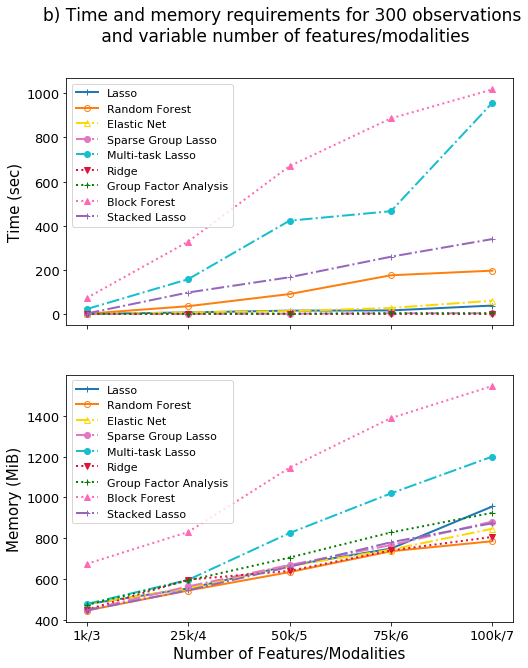

In [28]:
x = np.arange(5)

fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 10), sharex=True)
fig.show()
#fig.suptitle('a) Time and memory requirements for 50,000 features/\n5 modalities and variable number of observations', fontsize = 17)
fig.suptitle('b) Time and memory requirements for 300 observations\n and variable number of features/modalities', fontsize = 17)

ax1.plot(x,np.array(df_time['Lasso'], dtype = 'float'),c='tab:blue',marker="+",ls='-',label='Lasso',fillstyle='none', linewidth=2)
ax1.plot(x,np.array(df_time['RF'], dtype = 'float'),c='tab:orange',marker="o",ls='-',label='Random Forest',fillstyle='none', linewidth=2)
ax1.plot(x,np.array(df_time['EN'], dtype = 'float'),c='gold',marker="^",ls='-.',label='Elastic Net',fillstyle='none', linewidth=2)
ax1.plot(x,np.array(df_time['SGLasso'], dtype = 'float'),c='tab:pink',marker="o",ls='-.',label='Sparse Group Lasso', linewidth=2)
ax1.plot(x,np.array(df_time['Multi-task lasso'], dtype = 'float'),c='tab:cyan',marker="o",ls='-.',label='Multi-task Lasso', linewidth=2)
ax1.plot(x,np.array(df_time['Ridge'], dtype = 'float'),c='crimson',marker="v",ls=':',label='Ridge', linewidth=2)
ax1.plot(x,np.array(df_time['GFA'], dtype = 'float'),c='green',marker="+",ls=':',label='Group Factor Analysis', linewidth=2)
ax1.plot(x,np.array(df_time['Block Forests'], dtype = 'float'),c='hotpink',marker="^",ls=':',label='Block Forest', linewidth=2)
ax1.plot(x,np.array(df_time['Stacked lasso'], dtype = 'float'),c='tab:purple',marker="+",ls='-.',label='Stacked Lasso', linewidth=2)

ax1.set(ylabel='Time (sec)')
ax1.yaxis.label.set_size(15)
ax1.yaxis.set_tick_params(labelsize=13)

ax1.legend(loc=2, fontsize = 11)

ax2.plot(x,np.array(df_memory['Lasso'], dtype = 'float'),c='tab:blue',marker="+",ls='-',label='Lasso',fillstyle='none', linewidth=2)
ax2.plot(x,np.array(df_memory['RF'], dtype = 'float'),c='tab:orange',marker="o",ls='-',label='Random Forest',fillstyle='none', linewidth=2)
ax2.plot(x,np.array(df_memory['EN'], dtype = 'float'),c='gold',marker="^",ls='-.',label='Elastic Net',fillstyle='none', linewidth=2)
ax2.plot(x,np.array(df_memory['SGLasso'], dtype = 'float'),c='tab:pink',marker="o",ls='-.',label='Sparse Group Lasso', linewidth=2)
ax2.plot(x,np.array(df_memory['Multi-task lasso'], dtype = 'float'),c='tab:cyan',marker="o",ls='-.',label='Multi-task Lasso', linewidth=2)
ax2.plot(x,np.array(df_memory['Ridge'], dtype = 'float'),c='crimson',marker="v",ls=':',label='Ridge', linewidth=2)
ax2.plot(x,np.array(df_memory['GFA'], dtype = 'float'),c='green',marker="+",ls=':',label='Group Factor Analysis', linewidth=2)
ax2.plot(x,np.array(df_memory['Block Forests'], dtype = 'float'),c='hotpink',marker="^",ls=':',label='Block Forest', linewidth=2)
ax2.plot(x,np.array(df_memory['Stacked lasso'], dtype = 'float'),c='tab:purple',marker="+",ls='-.',label='Stacked Lasso', linewidth=2)

ax2.set(ylabel='Memory (MiB)')
ax2.yaxis.label.set_size(15)
ax2.yaxis.set_tick_params(labelsize=13)

ax2.legend(loc=2, fontsize = 11)

#plt.xlabel('Number of Samples', fontsize = 15)
plt.xlabel('Number of Features/Modalities', fontsize = 15)

my_xticks = df_memory.index
plt.xticks(x, my_xticks, fontsize = 13)

plt.draw()

plt.savefig('/home/mxenoc/workspace/multiomics-benchmark/plots/model_comparison_features.png', dpi=500, bbox_inches='tight')
#plt.yticks(fontsize = 13)
#plt.legend(loc=1, fontsize = 8)